In [2]:
! pip install upsetplot

In [1]:
# @title imports
import os
import pickle
import copy
import pandas as pd
import re
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx
from itertools import combinations


In [2]:
# Mount to google drive
from google.colab import drive
drive.mount('/content/drive')

# Change it to your google drive path where this notebook located.
drive_path = '/content/drive/MyDrive/CryptoniteAnalysis/'
os.chdir(drive_path)

Mounted at /content/drive


# Combine indicatores pkl file

In [3]:
git_dict_path = "DatasetAnalysis/indicatores/indicators.pkl"
blog_dict_path = "DatasetAnalysis/indicatores/indicators_type_dict.pkl"
# Open the file in binary read mode and load the contents
with open(git_dict_path, 'rb') as file:
    git_dict_indicator = pickle.load(file)

# Open the file in binary read mode and load the contents
with open(blog_dict_path, 'rb') as file:
    blog_dict_indicator = pickle.load(file)
git_dict_indicator_copy = copy.deepcopy(git_dict_indicator)
blog_dict_indicator_copy = copy.deepcopy(blog_dict_indicator)

In [4]:
blog_dict_indicator.keys()

dict_keys(['Acrostic', 'Anagram', 'Container', 'Deletion', 'Hidden Word', 'Homophone', 'Palindrome', 'Reversal'])

In [5]:
# Keys to combine
key_to_combine1 = 'Acrostic'
key_to_combine2 = 'Deletion'
new_key = 'Letter Manipulation'

# Combine the lists associated with the two keys
combined_values = blog_dict_indicator_copy[key_to_combine1] + blog_dict_indicator_copy[key_to_combine2]

# Add the combined list to the dictionary with the new key
blog_dict_indicator_copy[new_key] = combined_values

# Remove the old keys if desired
del blog_dict_indicator_copy[key_to_combine1]
del blog_dict_indicator_copy[key_to_combine2]

In [6]:
blog_dict_indicator_copy.keys()

dict_keys(['Anagram', 'Container', 'Hidden Word', 'Homophone', 'Palindrome', 'Reversal', 'Letter Manipulation'])

In [7]:
git_dict_indicator_copy.keys()

dict_keys(['Anagram', 'Filler', 'FinalSubstring', 'Initials', 'InitialSubstring', 'InsertAB', 'InsertBA', 'Reversal', 'sub_'])

In [81]:
common_items = list(set(blog_dict_indicator_copy['Hidden Word']) & set(blog_dict_indicator_copy['Container']))
print(common_items)
print(len(common_items))

['contents', 'inside', 'in', 'within', 'holds', 'concealing', 'contained', 'internal']
8


In [82]:
common_items = list(set(blog_dict_indicator_copy['Hidden Word']) & set(blog_dict_indicator_copy['Container']))
print(common_items)
print(len(common_items))

['contents', 'inside', 'in', 'within', 'holds', 'concealing', 'contained', 'internal']
8


In [83]:
len(git_dict_indicator['sub_'])

117

In [8]:
# Keys to combine
# keys_to_combine = ['FinalSubstring', 'Initials', 'InitialSubstring', 'InsertAB', 'InsertBA', 'sub_']
keys_to_combine = ['FinalSubstring', 'Initials', 'InitialSubstring']

new_key = 'Letter Manipulation'
# Combine the lists associated with the two keys
combined_values = []

for key in keys_to_combine:
    combined_values += git_dict_indicator_copy[key]

# Add the combined list to the dictionary with the new key
git_dict_indicator_copy[new_key] = combined_values

# Remove the old keys if desired
for key in keys_to_combine:
  del git_dict_indicator_copy[key]


In [9]:
# The key to be renamed and the new key name
filler_key = 'Filler'
container_key = 'Container'

# Rename the key
git_dict_indicator_copy[container_key] = git_dict_indicator_copy.pop(filler_key)

In [13]:
git_dict_indicator_copy.keys()

dict_keys(['Anagram', 'InsertAB', 'InsertBA', 'Reversal', 'sub_', 'Letter Selection', 'Container'])

In [14]:
blog_dict_indicator_copy.keys()

dict_keys(['Anagram', 'Container', 'Hidden Word', 'Homophone', 'Palindrome', 'Reversal', 'Letter Selection'])

In [10]:
# Iterate over the keys in git_dict_indicator_copy
for key, value in git_dict_indicator_copy.items():
    if key in blog_dict_indicator_copy:
        # If the key exists in blog_dict_indicator_copy, concatenate the lists
        blog_dict_indicator_copy[key] += value
        print(f"Key {key} exist")
    else:
        # If the key doesn't exist, create it and set its value
        # blog_dict_indicator_copy[key] = value
        print(f"Key {key} NOT exist")


Key Anagram exist
Key InsertAB NOT exist
Key InsertBA NOT exist
Key Reversal exist
Key sub_ NOT exist
Key Letter Manipulation exist
Key Container exist


In [16]:
len(blog_dict_indicator_copy['Letter Selection'])

212

In [11]:
# Remove duplicates from each list in the dictionary
for key in blog_dict_indicator_copy:
    blog_dict_indicator_copy[key] = list(set(blog_dict_indicator_copy[key]))

In [12]:
# File path (in your working directory)
file_path = 'DatasetAnalysis/indicatores/indicatores_combined_no_sib_.pkl'

# Save the dictionary as a pickle file
with open(file_path, 'wb') as pkl_file:
    pickle.dump(blog_dict_indicator_copy, pkl_file)

In [13]:
blog_dict_indicator_copy.keys()

dict_keys(['Anagram', 'Container', 'Hidden Word', 'Homophone', 'Palindrome', 'Reversal', 'Letter Manipulation'])

# indicatores clssification

In [14]:
# @title loading the data
# indicator_dict_path = "DatasetAnalysis/indicatores/indicatores_combined.pkl"
indicator_dict_path = "DatasetAnalysis/indicatores/indicatores_combined_no_sib_.pkl"

# Open the file in binary read mode and load the contents
with open(indicator_dict_path, 'rb') as file:
    indicator_dict = pickle.load(file)


In [15]:
common_items = list(set(indicator_dict['Hidden Word']) & set(indicator_dict['Container']))
print(common_items)
print(len(common_items))

['holds', 'inside', 'within', 'internal', 'concealing', 'contained', 'contents', 'in']
8


In [16]:
drive_path_for_datasets = 'datasets'

train_fp = drive_path_for_datasets + '/cryptonite-official-split/cryptonite-train.jsonl'
val_fp = drive_path_for_datasets + "/cryptonite-official-split/cryptonite-val.jsonl"
test_fp = drive_path_for_datasets + '/cryptonite-official-split/cryptonite-test.jsonl'

# # Read the JSON Lines file into a DataFrame
df_train = pd.read_json(train_fp, lines=True)
# df_val = pd.read_json(val_fp, lines=True)
# df_test = pd.read_json(test_fp, lines=True)


In [ ]:
# @title match indicator
# Function to check if any word from the list is in the clue sentence
def find_indicator(clue, indicator_dict):
    # Replace underscores with spaces in the clue
    # clue_preprocessed = clue.replace('_', ' ')

    for indicator, words in indicator_dict.items():
        # Preprocess words in the dictionary
        words_preprocessed = [word.replace('_', ' ') for word in words]

        # Check if any preprocessed word is in the preprocessed clue
        if any(word in clue for word in words_preprocessed):
            return indicator

    return None

    # Function to check for exact word match using regular expressions
def contains_exact_word(clue, word):
    pattern = r'\b' + re.escape(word) + r'\b'
    return re.search(pattern, clue) is not None

In [99]:
# Initialize new columns with default value 0
for key in indicator_dict:
    df_train[key] = 0
    # df_test[f'{key}_match'] = ''

# Check each clue and update the corresponding columns and print the matching words
for idx, row in tqdm(df_train.iterrows(), total=len(df_train)):
    # print(f"Processing clue {idx + 1}")
    clue = row['clue']
    clue_list = clue.split()
    found_indicator_flag = 0
    for key, words in indicator_dict.items():
        for word in words:
            if word in clue_list:
                df_train.at[idx, key] = 1
                # df_test.at[idx, f'{key}_match'] = word
                # print(f'Found "{word}" for key "{key}" in clue: "{clue}"')
                found_indicator_flag = 1
    # if found_indicator_flag == 0:
      # print(f'Not found an indicator for in clue: "{clue}"')
      # print("\n")


    # if idx + 1 >= 10:
    #   break

# Create the new column "appears in few indicators" which is the sum of the indicator columns for each row
df_train['appears in few indicators'] = df_train[list(indicator_dict.keys())].sum(axis=1)

SyntaxError: invalid syntax (<ipython-input-99-60f6c4968edb>, line 11)

In [17]:
# Add columns for each indicator_dict key, initializing them with 0
for indicator in indicator_dict.keys():
    df_train[indicator] = 0

# Iterate over each row in df_train with tqdm for progress tracking
for i, row in tqdm(df_train.iterrows(), total=len(df_train)):
    clue = row['clue'].split()  # Split clue into words
    clue_length = len(clue)

    # Check sequential 1-word, 2-word, and 3-word combinations
    for n in range(1, 4):
        for start in range(clue_length - n + 1):
            seq_combo = clue[start:start + n]
            combo_str = ' '.join(seq_combo)
            for indicator, words in indicator_dict.items():
                # Check if the sequential combination is in the indicator_dict value
                if combo_str in words:
                    df_train.at[i, indicator] = 1  # Set corresponding column to 1 if a match is found

100%|██████████| 470804/470804 [06:37<00:00, 1185.70it/s]


In [18]:
# Filter the DataFrame where 'Palindrome' column is 1
palindrome_clues = df_train[df_train['Palindrome'] == 1]['clue']

# Print the clues
for clue in palindrome_clues:
    print(clue)

ride continually up and down and wave to ship (6,7)
go up and down in the mountain air (5)
give over walkin' up and down without clothes (4,2,2)
movin' up and down repeatedly in reel (6)
uninterested, having no inclination either way (8)
robert crosby is jumping up and down (7)
round and round it goes, up and down (6,9)
in flight, it goes up and down (5)
they reel up and down in play (2,3)
apparently 12, in certain cases, going up and down ? (6)
watch cutter go up and down (6)
a woman going back and forth (4)
deck going up and down (4)
moving arm up and down (5)
in glass i'd shattered, playing, while sliding up and down the passages (9)
having no leanings either way - honest (7)
impracticable either way (3,2)
be accommodating either way (3,2)
girl found up and down chinese dynasty (6)
either way you can play it (5)
looks up and down (4)
work up and down deck (4)
a boat that goes back and forth (5)
build either way (3,2)
very thin - straight up and down (5)
either way it's a pick-me-up 

In [19]:
# Create the new column "appears in few indicators" which is the sum of the indicator columns for each row
df_train['appears in few indicators'] = df_train[list(indicator_dict.keys())].sum(axis=1)

In [20]:
# File path
# file_path = 'DatasetAnalysis/indicatores/df_of_train_with_indicatores.pkl'
file_path = 'DatasetAnalysis/indicatores/df_of_train_with_indicatores_no_sub.pkl'

# Save the dictionary as a pickle file
with open(file_path, 'wb') as pkl_file:
    pickle.dump(df_train, pkl_file)

# dataset analysis

In [21]:
# @title loading the data

# @title loading the data
indicator_dict_path = "DatasetAnalysis/indicatores/indicatores_combined_no_sib_.pkl"
# Open the file in binary read mode and load the contents
with open(indicator_dict_path, 'rb') as file:
    indicator_dict = pickle.load(file)


df_train_with_indicatores_path = "DatasetAnalysis/indicatores/df_of_train_with_indicatores_no_sub.pkl"
# Open the file in binary read mode and load the contents
with open(df_train_with_indicatores_path, 'rb') as file:
    df_train = pickle.load(file)

In [23]:
# Step 1: Find the maximal value in 'appears in few indicators'
max_value = df_train['appears in few indicators'].max()

# Step 2: Get the first clue with the maximal value
first_max_clue = df_train[df_train['appears in few indicators'] == max_value]['clue'].iloc[0]
print("First clue with the maximal value:", first_max_clue)
# Step 3: Check the words in indicator_dict against the clue
found = False
for key, words in indicator_dict.items():
    for word in words:
        if word in first_max_clue:
            print(f"Found the word '{word}' in key '{key}'.")
            found = True
            # break
    # if found:
    #     break

if not found:
    print("No word from indicator_dict found in the clue.")


First clue with the maximal value: surprise in a report about tory leader (7)
Found the word 'out' in key 'Anagram'.
Found the word 'about' in key 'Anagram'.
Found the word 'about' in key 'Container'.
Found the word 'is' in key 'Container'.
Found the word 'in' in key 'Container'.
Found the word 'in' in key 'Hidden Word'.
Found the word 'report' in key 'Homophone'.
Found the word 'about' in key 'Reversal'.
Found the word 'rise' in key 'Reversal'.
Found the word 'lead' in key 'Letter Manipulation'.
Found the word 'leader' in key 'Letter Manipulation'.


In [103]:
# Step 1: Find the maximum value in 'appears in few indicators'
max_value = df_train['appears in few indicators'].max()

# Step 2: Filter the DataFrame where 'appears in few indicators' equals the maximum value
max_value_clues = df_train[df_train['appears in few indicators'] == max_value]['clue']

# Step 3: Print the maximum value and the corresponding clues
print("Maximal value in 'appears in few indicators':", max_value)
print("Clues with this maximal value:")
print(max_value_clues.to_string(index=False))

Maximal value in 'appears in few indicators': 6
Clues with this maximal value:
      recoil from report about dissolute romeo (9)
sound of laughter about north carolina's govern...
 body found in town hall barrister heard about (7)
sound catty, seeing what a cruel husband has le...
             sound of hooter around lunchtime? (5)
               they reel up and down in play (2,3)
                 sound of organ all around one (5)
come round and, from the sound of it, see to ev...
ton? hang about - they say it's only 5 per cent...
        surprise in a report about tory leader (7)
          painting of old scot you heard about (7)
one of the 14 about ship is embracing you audib...
     in hurry, put back in speech from hamlet? (6)
  some proposal voiced about discharge of fire (5)
 back up say over nicer alternative in general (7)
in audible range of someone talking about you? (7)
what did you say about painting in brownish pig...
sound often heard from radar equipment as littl...
bre

In [6]:
indicator_dict.keys()

dict_keys(['Anagram', 'Container', 'Hidden Word', 'Homophone', 'Palindrome', 'Reversal', 'Letter Selection'])

In [17]:
# List of specific columns to sum
columns_to_sum = indicator_dict.keys()

# Calculate the sum of each specified column and print it
for column in columns_to_sum:
    col_sum = df_train[column].sum()
    print(f'Sum of {column}: {col_sum}')


Sum of Anagram: 181790
Sum of Container: 212562
Sum of Hidden Word: 190849
Sum of Homophone: 10574
Sum of Palindrome: 0
Sum of Reversal: 72955
Sum of Letter Selection: 281333


Value 0: 92228 occurrences
Value 1: 132110 occurrences
Value 2: 133708 occurrences
Value 3: 84348 occurrences
Value 4: 24929 occurrences
Value 5: 3445 occurrences
Value 6: 36 occurrences


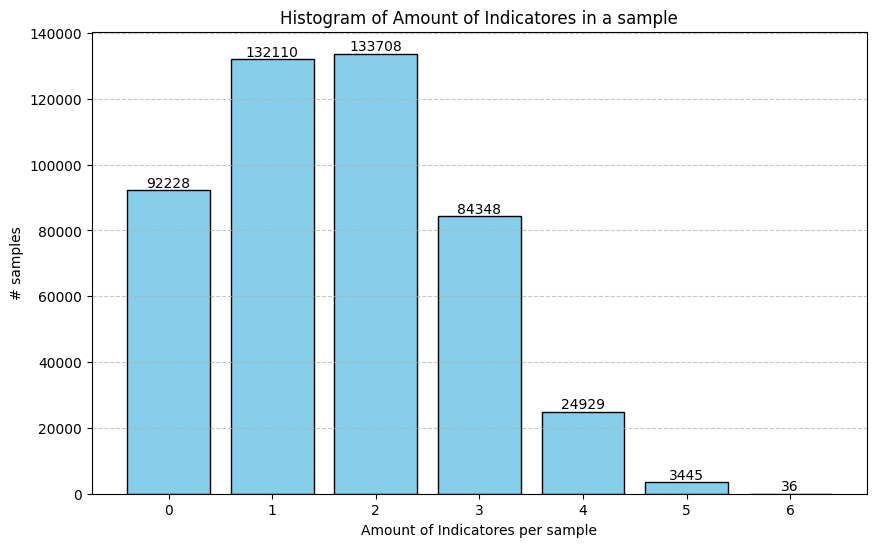

In [27]:
# @title Approves stats

# Get the counts of each unique value in the series
value_counts = df_train['appears in few indicators'].value_counts().sort_index()

# Print the counts
for value, count in value_counts.items():
    print(f'Value {value}: {count} occurrences')

    # Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(value_counts.index, value_counts.values, color='skyblue', edgecolor='black')

# Add the counts above each bar
for index, value in value_counts.items():
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.title('Histogram of Amount of Indicatores in a sample')
plt.xlabel('Amount of Indicatores per sample')
plt.ylabel('# samples')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('DatasetAnalysis/indicatores/figures/Histogram_of_Indicatores.png', format='png', dpi=300)  # Adjust the filename and format as needed
plt.show()

Value 0: 19.59% of occurrences
Value 1: 28.06% of occurrences
Value 2: 28.40% of occurrences
Value 3: 17.92% of occurrences
Value 4: 5.29% of occurrences
Value 5: 0.73% of occurrences
Value 6: 0.01% of occurrences


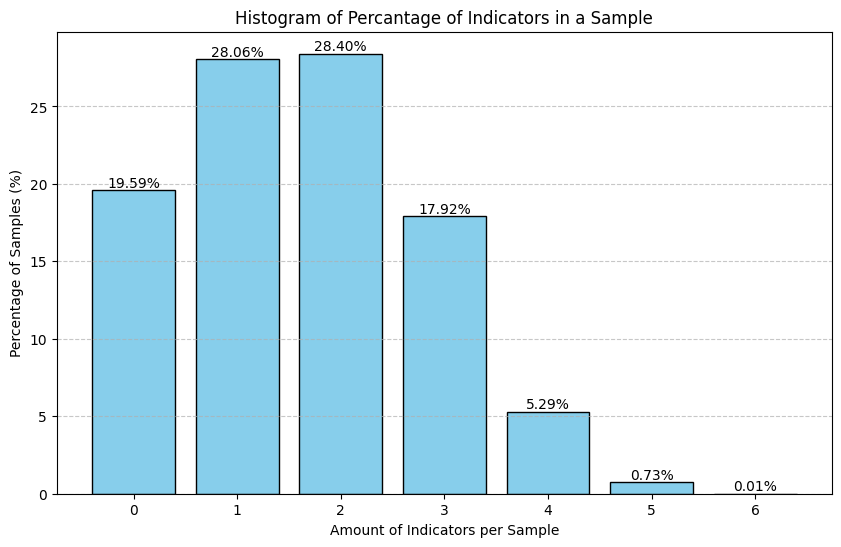

In [24]:
# @title Approves stats

# Get the counts of each unique value in the series
value_counts = df_train['appears in few indicators'].value_counts().sort_index()

# Calculate the percentage for each unique value
total_count = value_counts.sum()
percentages = (value_counts / total_count) * 100

# Print the percentages
for value, percentage in percentages.items():
    print(f'Value {value}: {percentage:.2f}% of occurrences')

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(percentages.index, percentages.values, color='skyblue', edgecolor='black')

# Add the percentages above each bar
for index, percentage in percentages.items():
    plt.text(index, percentage, f'{percentage:.2f}%', ha='center', va='bottom')

plt.title('Histogram of Percantage of Indicators in a Sample')
plt.xlabel('Amount of Indicators per Sample')
plt.ylabel('Percentage of Samples (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('DatasetAnalysis/indicatores/figures/Histogram_of_Indicatores_percantage.png', format='png', dpi=300)  # Adjust the filename and format as needed
plt.show()


In [26]:
df = df_train[['Anagram', 'Container', 'Hidden Word', 'Homophone', 'Palindrome', 'Reversal', 'Letter Manipulation']]

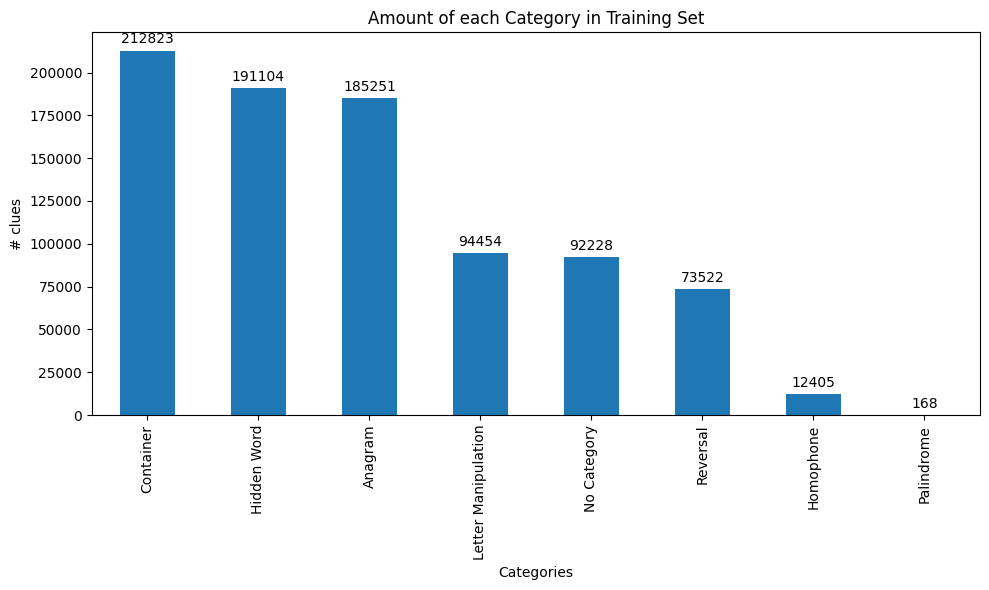

In [27]:
import matplotlib.pyplot as plt

# Calculate the sum of each column and include zero sums
df_sum = df.sum().reindex(df.columns, fill_value=0).sort_values(ascending=False)

# Calculate the count of rows where 'appears in few indicators' is 0
none_count = (df_train['appears in few indicators'] == 0).sum()

# Append the "None" count to the df_sum series
df_sum['No Category'] = none_count

# Sort values again if needed (to keep 'None' in a specific order)
df_sum = df_sum.sort_values(ascending=False)

# Plot the bar chart
ax = df_sum.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add numbers above each bar
for container in ax.containers:
    # Iterate through each bar in the container
    for bar in container:
        height = bar.get_height()
        ax.annotate(f'{int(height)}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords='offset points',
                    ha='center', va='bottom')

# Add titles and labels
plt.title('Amount of each Category in Training Set')
plt.xlabel('Categories')
plt.ylabel('# clues')
plt.xlabel('Categories')

# Adjust spacing to avoid cropping
plt.tight_layout()

# Save the figure
# plt.savefig('DatasetAnalysis/indicatores/figures/Count_of_Categories.png', format='png', dpi=300)
# Show the plot
plt.show()


In [31]:
common_items = list(set(indicator_dict['Letter Selection']) & set(indicator_dict['Hidden Word']))
# print(common_items)
print(len(common_items))
print(len(indicator_dict['Letter Selection']))
print(len(indicator_dict['Hidden Word']))

0
158
55


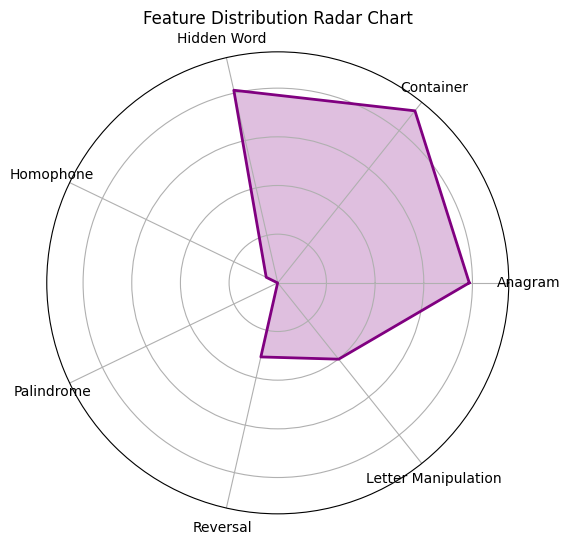

In [28]:

# Calculate the mean of each column
means = df.mean()

# Create a radar chart
labels = df.columns
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
stats = means.tolist()

stats += stats[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, stats, color='purple', alpha=0.25)
ax.plot(angles, stats, color='purple', linewidth=2)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

plt.title('Feature Distribution Radar Chart')
plt.show()

<ipython-input-72-62eca0621a98>:69: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


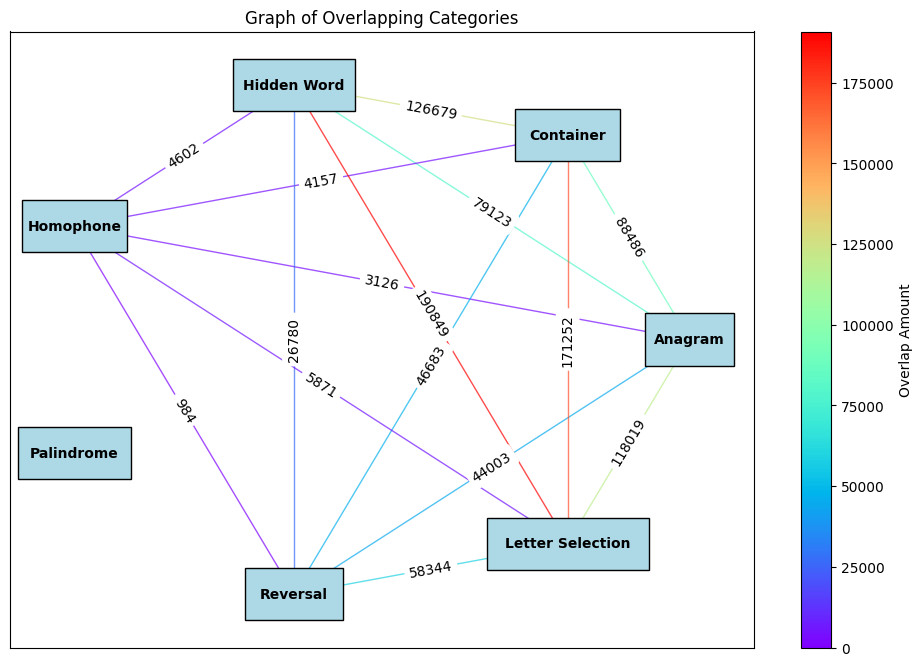

In [72]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.patches as patches

# Sample DataFrame setup for demonstration; replace with your DataFrame
# df = pd.read_csv('your_file.csv')

# Find overlaps between categories
overlaps = pd.DataFrame(index=df.columns, columns=df.columns, data=0)

# Compute overlaps
for i in df.columns:
    for j in df.columns:
        if i != j:
            overlaps.loc[i, j] = df[(df[i] == 1) & (df[j] == 1)].shape[0]

# Create a graph
G = nx.Graph()

# Add nodes
categories = df.columns
G.add_nodes_from(categories)

# Add edges based on overlaps with weight as overlap value
for i in categories:
    for j in categories:
        if i != j and overlaps.loc[i, j] > 0:
            # Add edge with overlap as weight
            G.add_edge(i, j, weight=overlaps.loc[i, j])

# Use circular layout for positioning nodes
pos = nx.circular_layout(G)

# Extract edge weights for color mapping
edge_weights = nx.get_edge_attributes(G, 'weight')
max_weight = max(edge_weights.values(), default=1)  # Avoid division by zero

# Set edge color based on weight using the rainbow colormap
edge_colors = [cm.rainbow(weight / max_weight) for weight in edge_weights.values()]

# Plot the graph with color bar and edge labels
plt.figure(figsize=(12, 8))

# Draw edges
nx.draw_networkx_edges(G, pos, width=1, alpha=0.7, edge_color=edge_colors)

# Draw nodes as rectangles with dynamic sizing
for node, (x, y) in pos.items():
    # Compute rectangle size based on node label length
    label = node
    label_size = len(label)
    width = 0.1 + 0.025 * label_size  # Adjust width based on label length
    height = 0.2
    # Draw rectangle around node
    plt.gca().add_patch(patches.Rectangle((x - width / 2, y - height / 2), width, height, edgecolor='black', facecolor='lightblue'))
    # Annotate the rectangle with the node label
    plt.text(x, y, label, fontsize=10, fontweight='bold', ha='center', va='center', color='black')

# Draw edge labels
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f'{d["weight"]}' for u, v, d in G.edges(data=True)},
                             font_color='black')

# Add color bar for the edge colors
sm = plt.cm.ScalarMappable(cmap='rainbow', norm=mcolors.Normalize(vmin=0, vmax=max_weight))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Overlap Amount')

plt.title('Graph of Overlapping Categories')
plt.show()


<ipython-input-29-9a4908be6a2d>:71: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


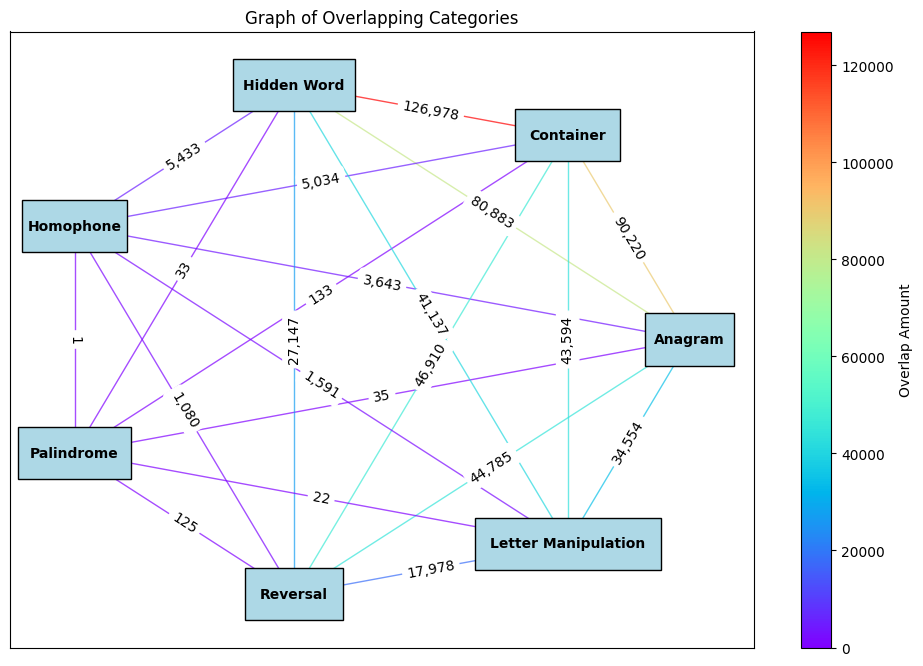

In [29]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.patches as patches

# Sample DataFrame setup for demonstration; replace with your DataFrame
# df = pd.read_csv('your_file.csv')

# Find overlaps between categories
overlaps = pd.DataFrame(index=df.columns, columns=df.columns, data=0)

# Compute overlaps
for i in df.columns:
    for j in df.columns:
        if i != j:
            overlaps.loc[i, j] = df[(df[i] == 1) & (df[j] == 1)].shape[0]

# Create a graph
G = nx.Graph()

# Add nodes
categories = df.columns
G.add_nodes_from(categories)

# Add edges based on overlaps with weight as overlap value
for i in categories:
    for j in categories:
        if i != j and overlaps.loc[i, j] > 0:
            # Add edge with overlap as weight
            G.add_edge(i, j, weight=overlaps.loc[i, j])

# Use circular layout for positioning nodes
pos = nx.circular_layout(G)

# Extract edge weights for color mapping
edge_weights = nx.get_edge_attributes(G, 'weight')
max_weight = max(edge_weights.values(), default=1)  # Avoid division by zero

# Set edge color based on weight using the rainbow colormap
edge_colors = [cm.rainbow(weight / max_weight) for weight in edge_weights.values()]

# Format edge labels with commas
formatted_edge_labels = { (u, v): f'{d["weight"]:,.0f}' for u, v, d in G.edges(data=True) }

# Plot the graph with color bar and edge labels
plt.figure(figsize=(12, 8))

# Draw edges
nx.draw_networkx_edges(G, pos, width=1, alpha=0.7, edge_color=edge_colors)

# Draw nodes as rectangles with dynamic sizing
for node, (x, y) in pos.items():
    # Compute rectangle size based on node label length
    label = node
    label_size = len(label)
    width = 0.1 + 0.025 * label_size  # Adjust width based on label length
    height = 0.2
    # Draw rectangle around node
    plt.gca().add_patch(patches.Rectangle((x - width / 2, y - height / 2), width, height, edgecolor='black', facecolor='lightblue'))
    # Annotate the rectangle with the node label
    plt.text(x, y, label, fontsize=10, fontweight='bold', ha='center', va='center', color='black')

# Draw edge labels with formatted numbers
nx.draw_networkx_edge_labels(G, pos, edge_labels=formatted_edge_labels, font_color='black')

# Add color bar for the edge colors
sm = plt.cm.ScalarMappable(cmap='rainbow', norm=mcolors.Normalize(vmin=0, vmax=max_weight))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Overlap Amount')

plt.title('Graph of Overlapping Categories')
# Save the plot to a file
# plt.savefig('DatasetAnalysis/indicatores/figures/overlapping_categories_graph.png', format='png', dpi=300)  # Adjust the filename and format as needed

plt.show()
